#Predicting Loan Approvals Using Machine Learning Models

##1.Project Overview

The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, tenure, cibil score, education, assests and many other variables. Through this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

##2.Data Information

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.



## Variable Description

| Variable                 | Description                                                |
|--------------------------|------------------------------------------------------------|
| `loan_id`                | Unique loan ID                                             |
| `no_of_dependents`       | Number of dependents of the applicant                      |
| `education`              | Education level of the applicant                           |
| `self_employed`          | If the applicant is self-employed or not                   |
| `income_annum`           | Annual income of the applicant                             |
| `loan_amount`            | Loan amount requested by the applicant                     |
| `loan_tenure`            | Tenure of the loan requested by the applicant (in years)   |
| `cibil_score`            | CIBIL score of the applicant                               |
| `residential_asset_value`| Value of the residential asset of the applicant            |
| `commercial_asset_value` | Value of the commercial asset of the applicant             |
| `luxury_asset_value`     | Value of the luxury asset of the applicant                 |
| `bank_assets_value`      | Value of the bank asset of the applicant                   |
| `loan_status`            | Status of the loan (Approved/Rejected)                     |


##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

In [2]:
!pip install logitboost

In [3]:
!pip install dask[dataframe]

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


In [6]:
# Loading the dataset
file_path = 'loan_approval_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
#Checking the shape of the dataset
df.shape

(4269, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [10]:
# Removing the unnecessary load_id as it is an identifier column
df.drop('loan_id', axis=1, inplace=True)

In [11]:
# Checking for null/missing values
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [12]:
# Check for uniqueness in each column
df.nunique()

,0
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188
luxury_assets_value,379


In [13]:
# Calculate Movable Assets and Immovable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

# Drop the specified columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

# Display the first few rows of the updated DataFrame
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [14]:
df.shape

(4269, 10)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
Movable_assets,4269.0,2.010300e+07,1.183658e+07,300000.0,10000000.0,19600000.0,29100000.0,53800000.0
Immovable_assets,4269.0,1.244577e+07,9.232541e+06,-100000.0,4900000.0,10600000.0,18200000.0,46600000.0


In [16]:
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
loan_status,object
Movable_assets,int64
Immovable_assets,int64


##4.Exploratory Data Analysis (EDA)


###Number of Dependents

Text(0.5, 1.0, 'Number of Dependents')

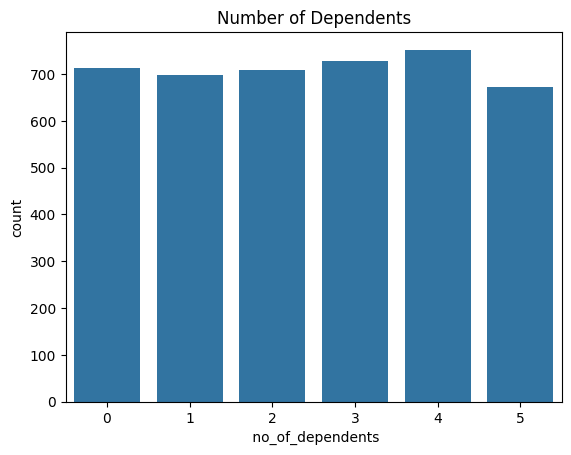

In [17]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases, we assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

###Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

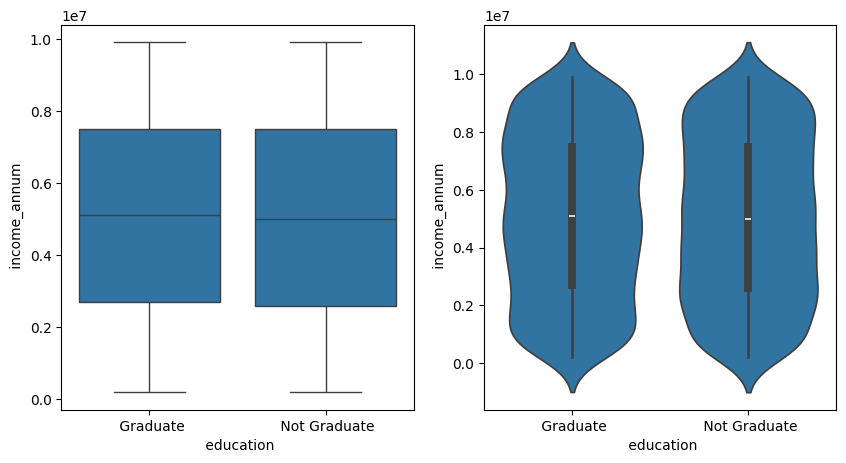

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

###Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

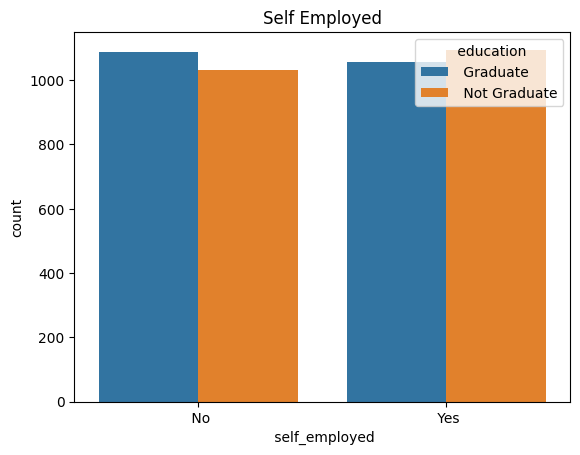

In [19]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed. This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable. But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. This is a very important factor to consider while predicting the loan approval.

###Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

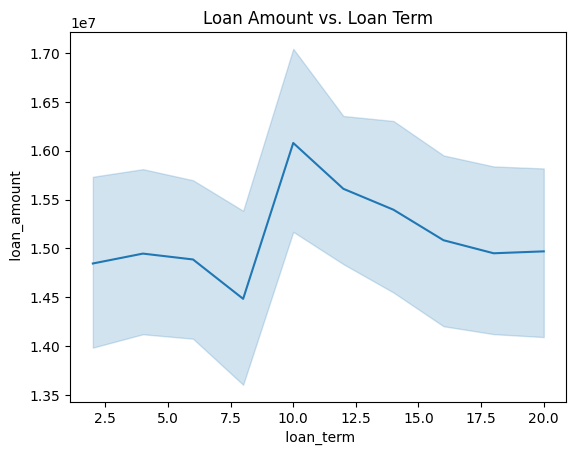

In [20]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

Between the loan tenure of 2.5 - 7.5 years the loan amount is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years.

###CIBIL Score Distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

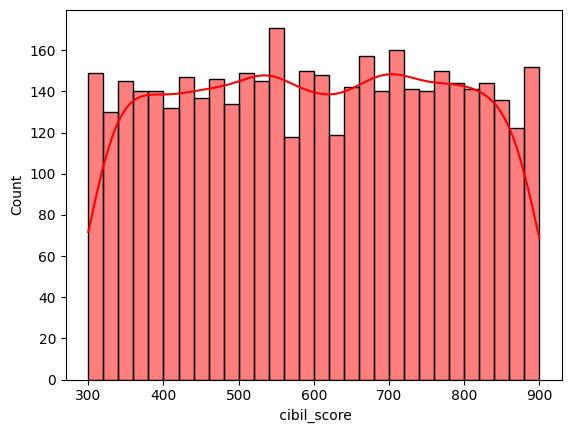

In [21]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

Majority of the customers have cibil score below 649, which affects their loan application. However there are many applicants with cibil score above 649, which is a good sign for the bank. The bank can target these customers and provide them with priority services. The bank can also provide them with special offers and discounts to attract them to take loans from the bank. From this, I build a hypothesis that the customers with cibil score above 649 are more likely to get their loan approve

###Asset Distribution

<Axes: xlabel='Immovable_assets', ylabel='Count'>

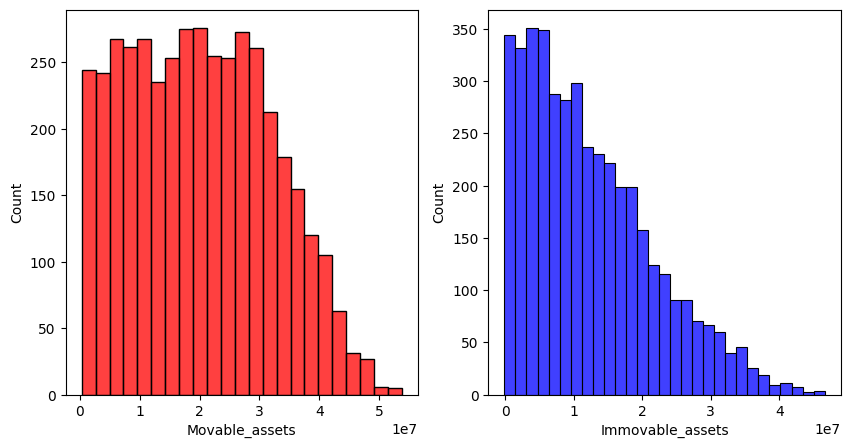

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

Assets play a major role in loan application. They provides a security to the bank that the person will repay the loan. Looking at the assets, as eralier mentionedI have categorized them in movable and immovable assets. The above graphs shows the distribution of movable and immovable assets in the dataset.

Looking at the movable assets which include bank assets and luxury assets, majority of the applicants have less than 30 million and there is a slight trend of decreasing number of applicants as the movable assets increases. Coming to the immovable assets, which include residential assets and commercial assets, majority of the applicants have less than 15 million of immovable assets and there is a strong trend of decreasing number of applicants as the immovable assets increases after 20 million.

###Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

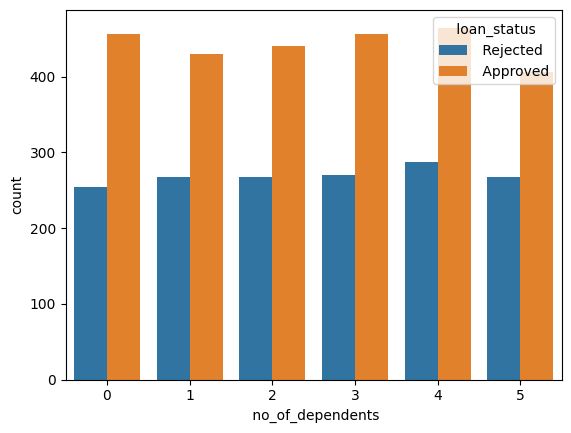

In [23]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents. But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis. But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

###Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

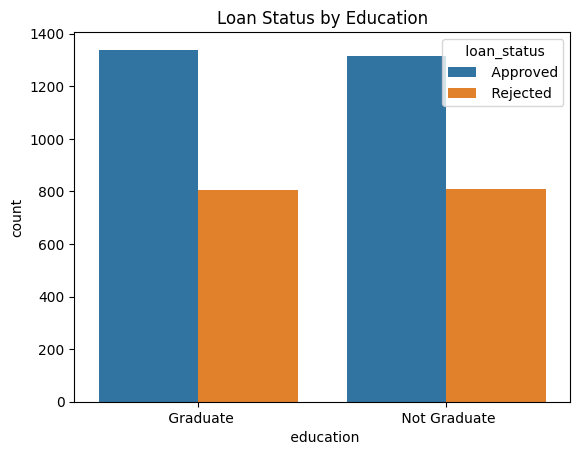

In [24]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

My hypothesis regarding the education not being factor in loan approval was right. The graph shows very minor difference between loan approval and rejection count for the graduate and non graduate applicants. The difference is not significant enough.

###Annual Income vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

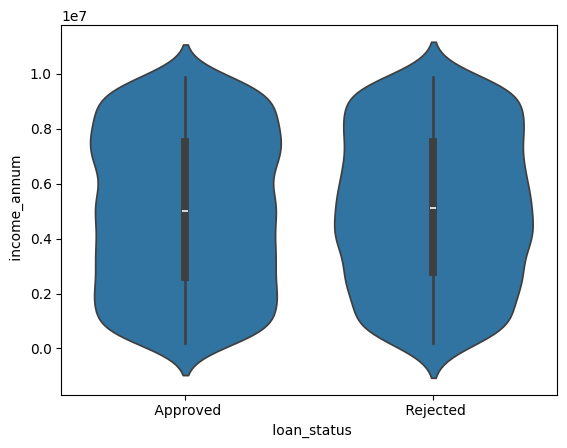

In [25]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

###Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

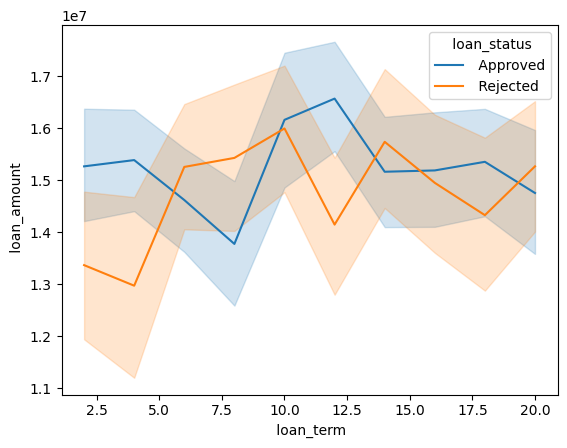

In [26]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

###CIBIL Score Vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

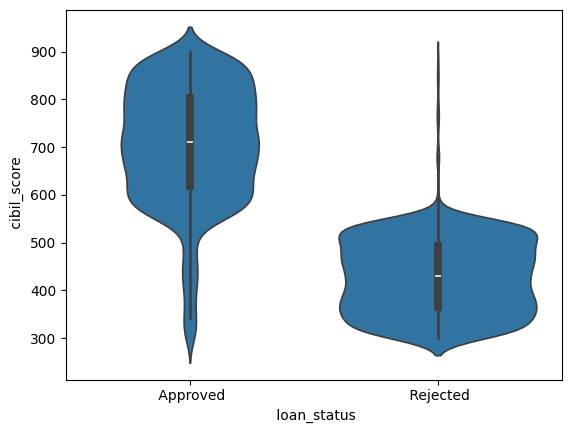

In [27]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

###Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

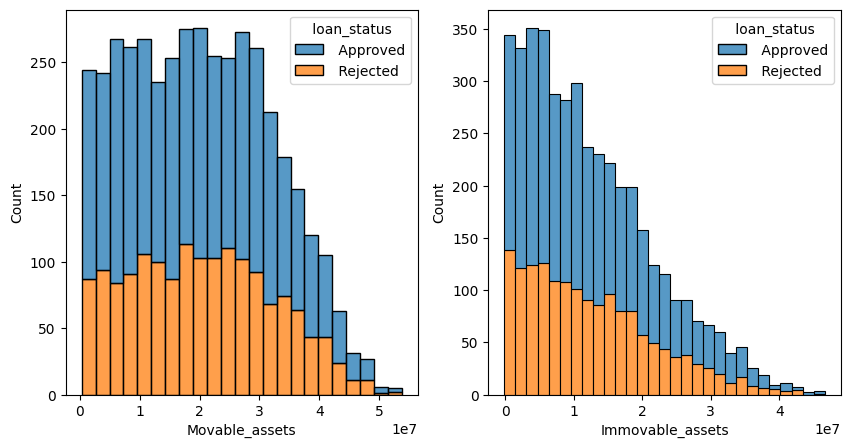

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

##5.Predictive Modeling

###Model Training

In [29]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [30]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [32]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0),
    "LogitBoost": LogitBoost()
}


In [33]:
from sklearn.metrics import confusion_matrix
# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    predictions = {}
    feature_importances = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        predictions[name] = y_pred

        print(f"{name} results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}\n")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': model.feature_importances_})
            feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
            feature_importance.reset_index(drop=True, inplace=True)
            feature_importances[name] = feature_importance

            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Features', data=feature_importance)
            plt.title(f'Feature Importance for {name}')
            plt.show()

    return results, predictions, feature_importances


###Model Evaluation

Logistic Regression results:
Accuracy: 0.6276
Precision: 0.3138
Recall: 0.5000
F1 Score: 0.3856



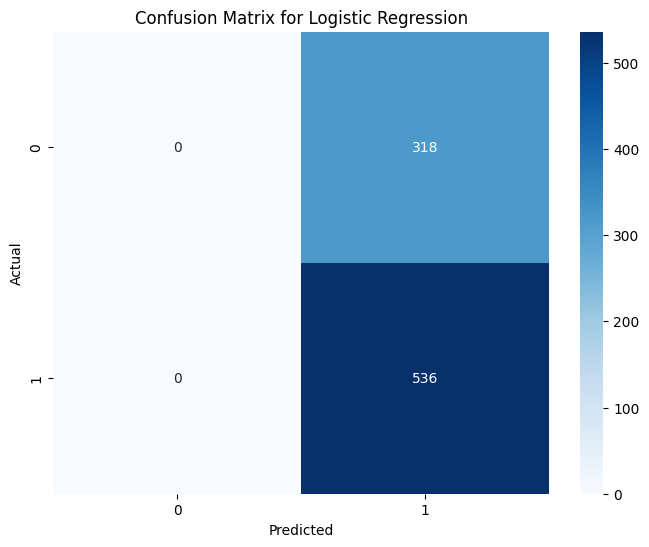

Decision Tree results:
Accuracy: 0.9813
Precision: 0.9806
Recall: 0.9793
F1 Score: 0.9799



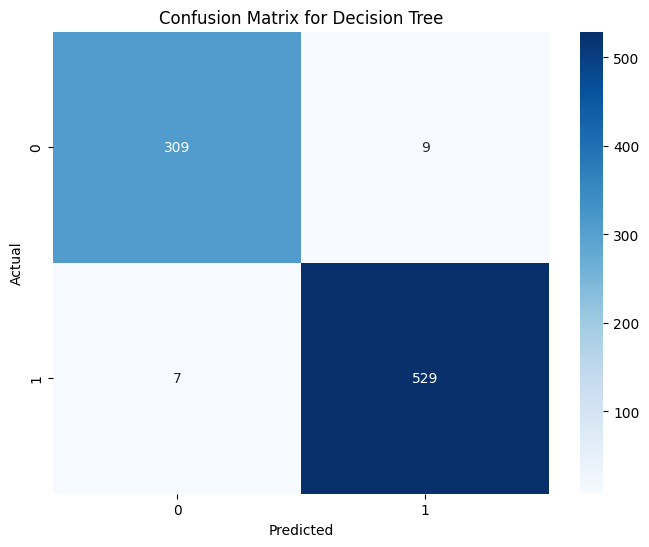

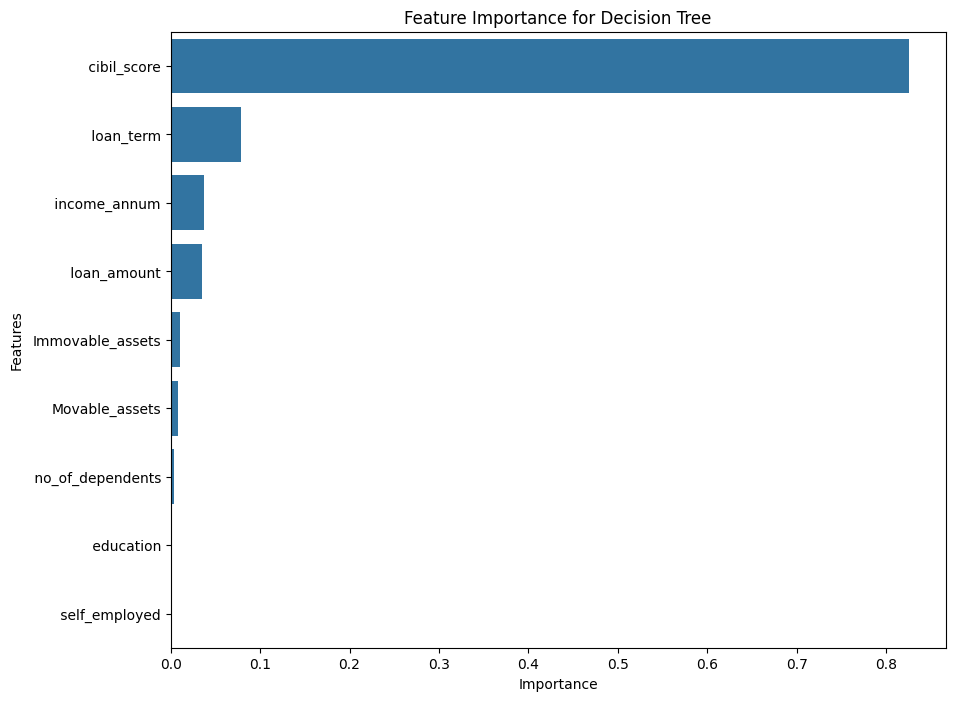

Random Forest results:
Accuracy: 0.9778
Precision: 0.9784
Recall: 0.9740
F1 Score: 0.9761



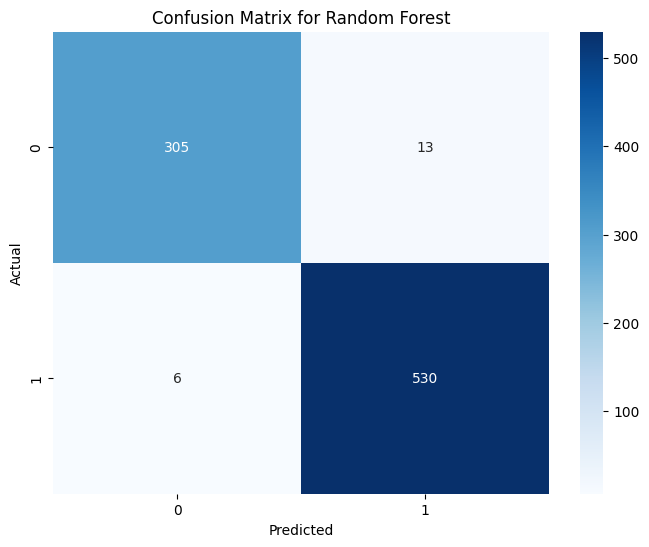

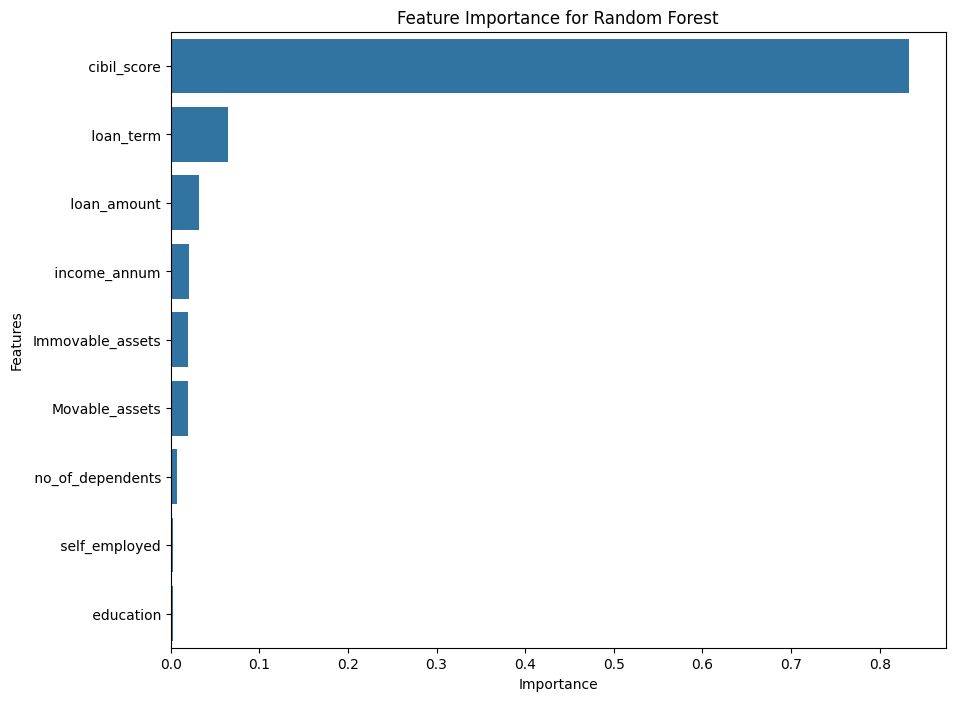

AdaBoost results:
Accuracy: 0.9684
Precision: 0.9683
Recall: 0.9639
F1 Score: 0.9660



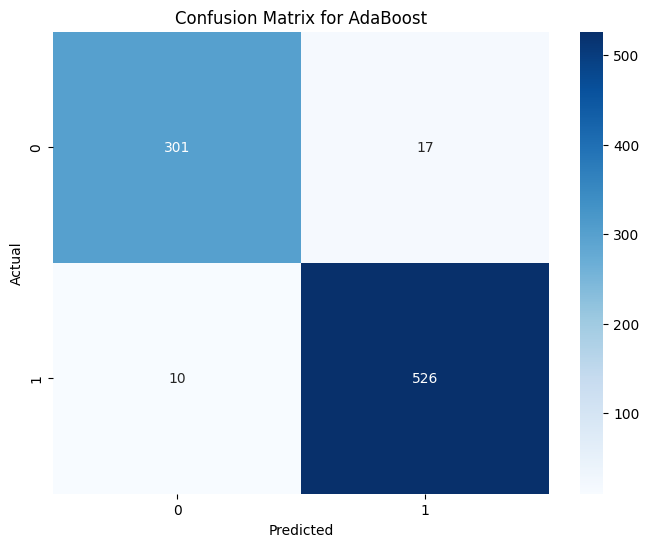

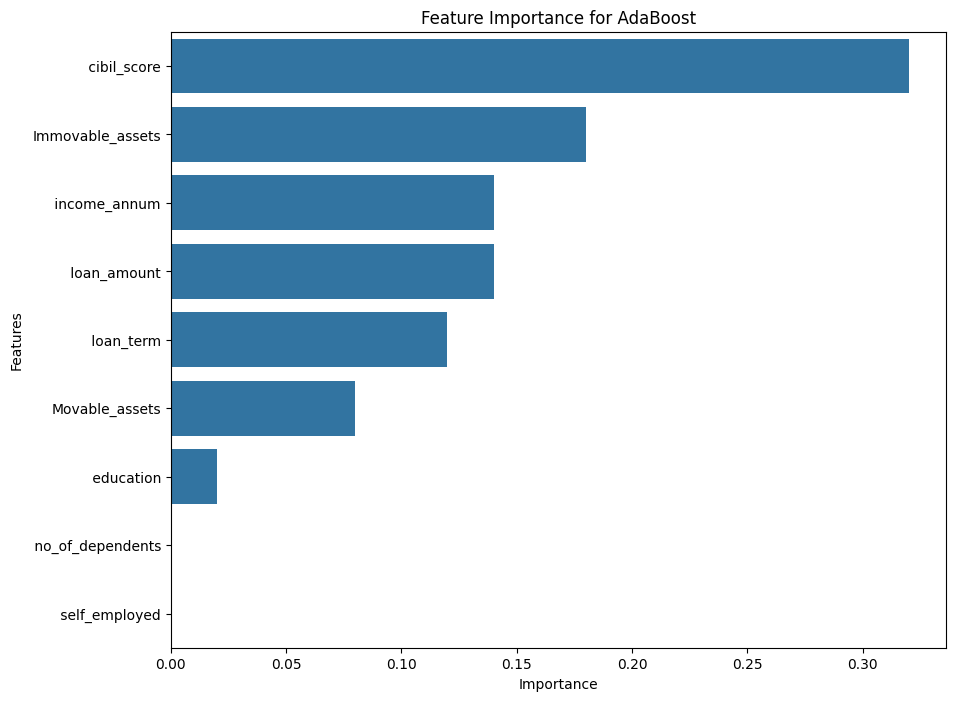

Gradient Boosting results:
Accuracy: 0.9789
Precision: 0.9807
Recall: 0.9743
F1 Score: 0.9773



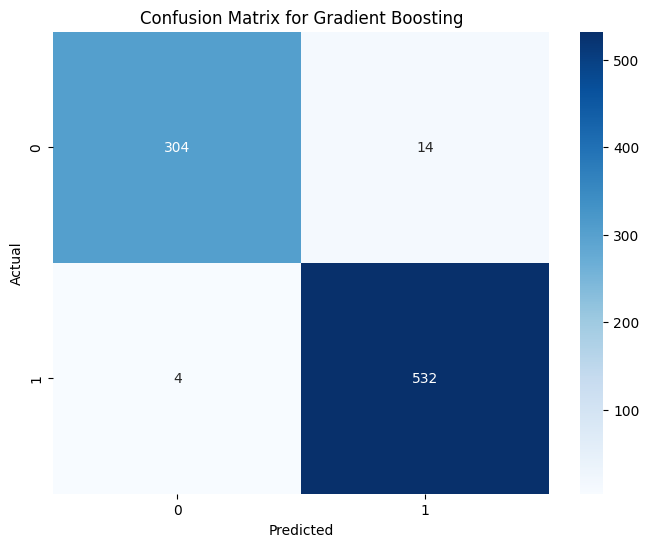

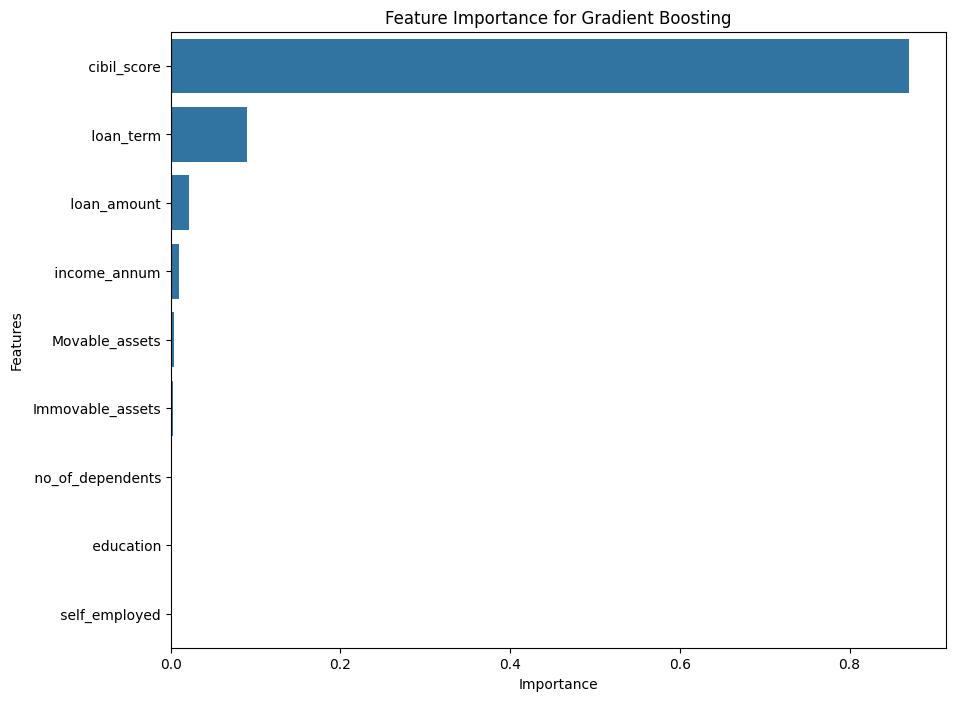

XGBoost results:
Accuracy: 0.9824
Precision: 0.9821
Recall: 0.9803
F1 Score: 0.9812



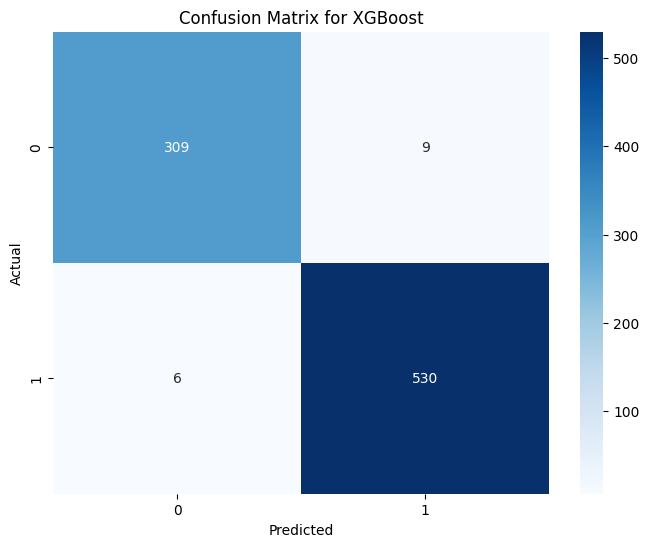

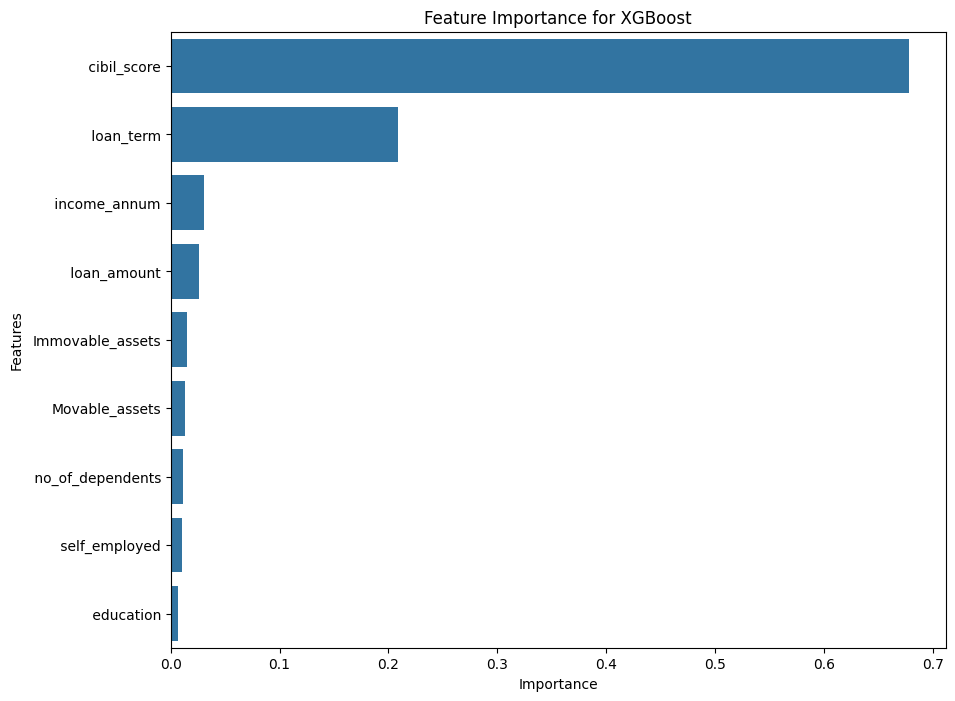

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2120, number of negative: 1295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620791 -> initscore=0.492905
[LightGBM] [Info] Start training from score 0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

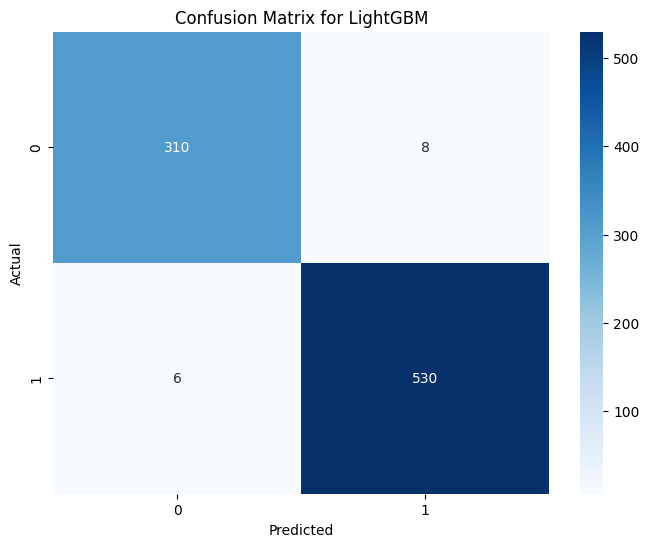

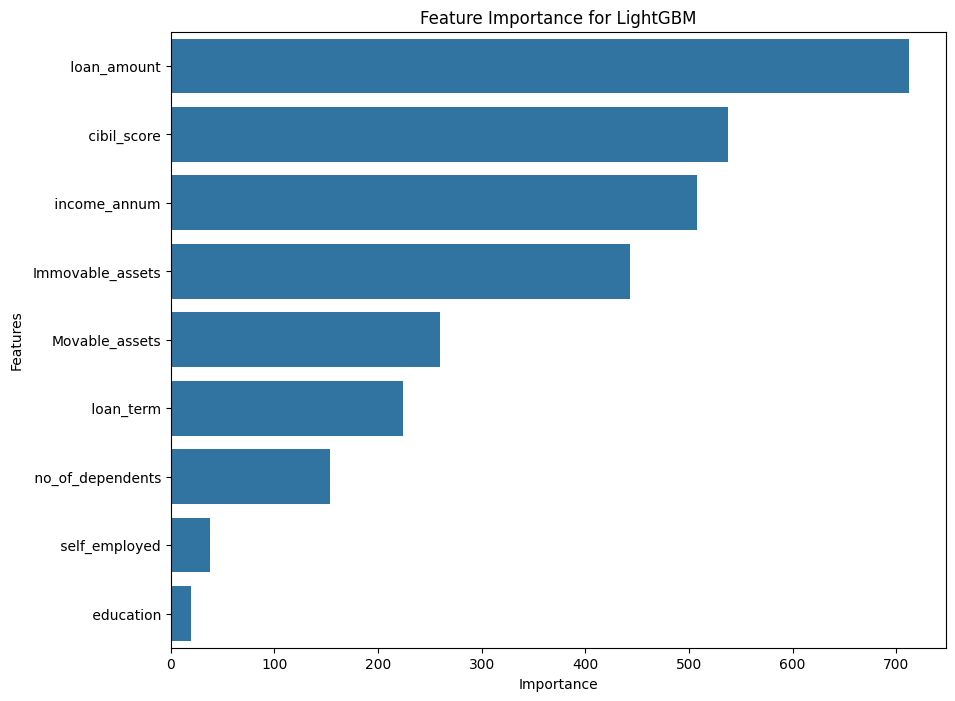

CatBoost results:
Accuracy: 0.9789
Precision: 0.9787
Recall: 0.9762
F1 Score: 0.9774



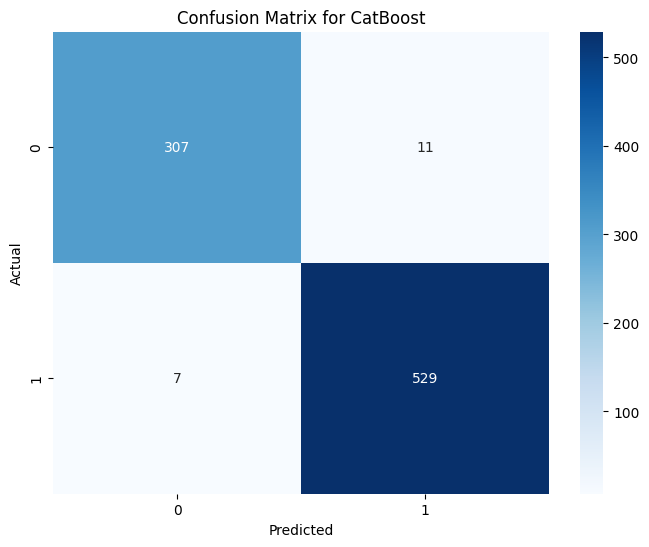

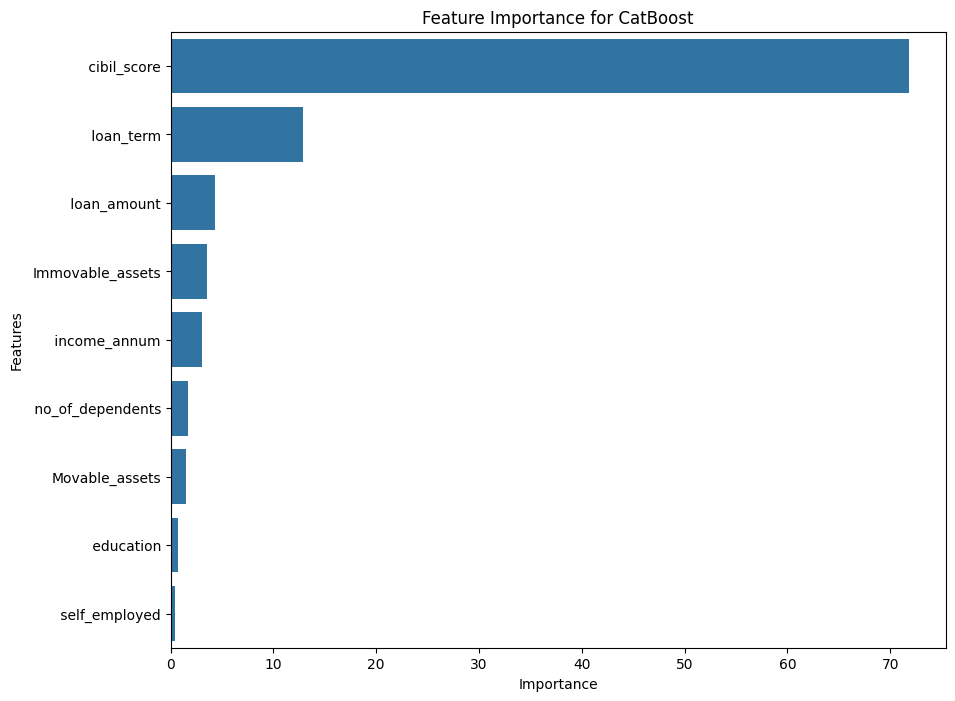

LogitBoost results:
Accuracy: 0.9778
Precision: 0.9798
Recall: 0.9727
F1 Score: 0.9760



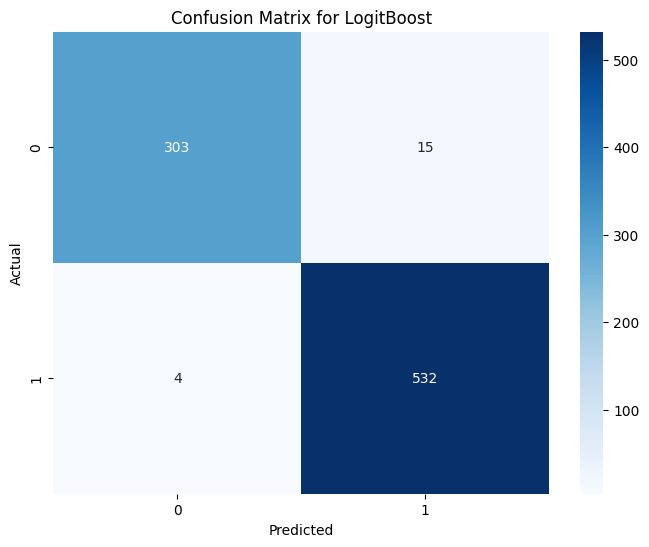

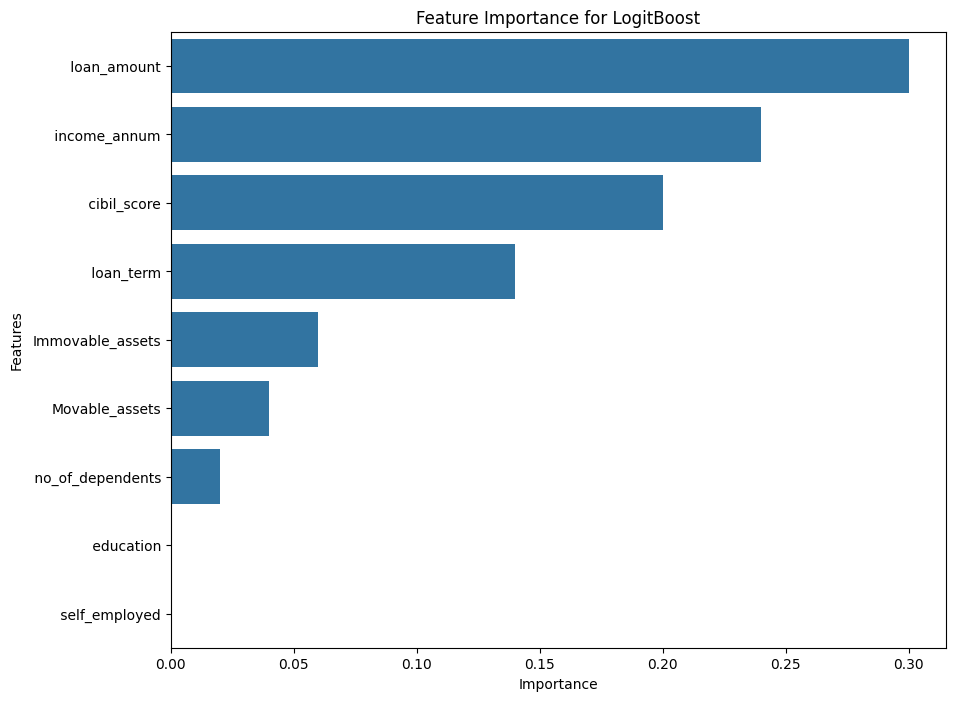

In [34]:
# Train and evaluate the models
results, predictions, feature_importances = train_and_evaluate(models, X_train, X_test, y_train, y_test)

In [35]:
# Display results in a table format
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest,AdaBoost,Gradient Boosting,XGBoost,LightGBM,CatBoost,LogitBoost
accuracy,0.627635,0.981265,0.977752,0.968384,0.978923,0.982436,0.983607,0.978923,0.977752
precision,0.313817,0.980560,0.978383,0.968269,0.980686,0.982127,0.983071,0.978668,0.979774
recall,0.500000,0.979319,0.973963,0.963942,0.974256,0.980252,0.981824,0.976175,0.972684
f1_score,0.385612,0.979933,0.976092,0.966026,0.977305,0.981175,0.982441,0.977395,0.976028


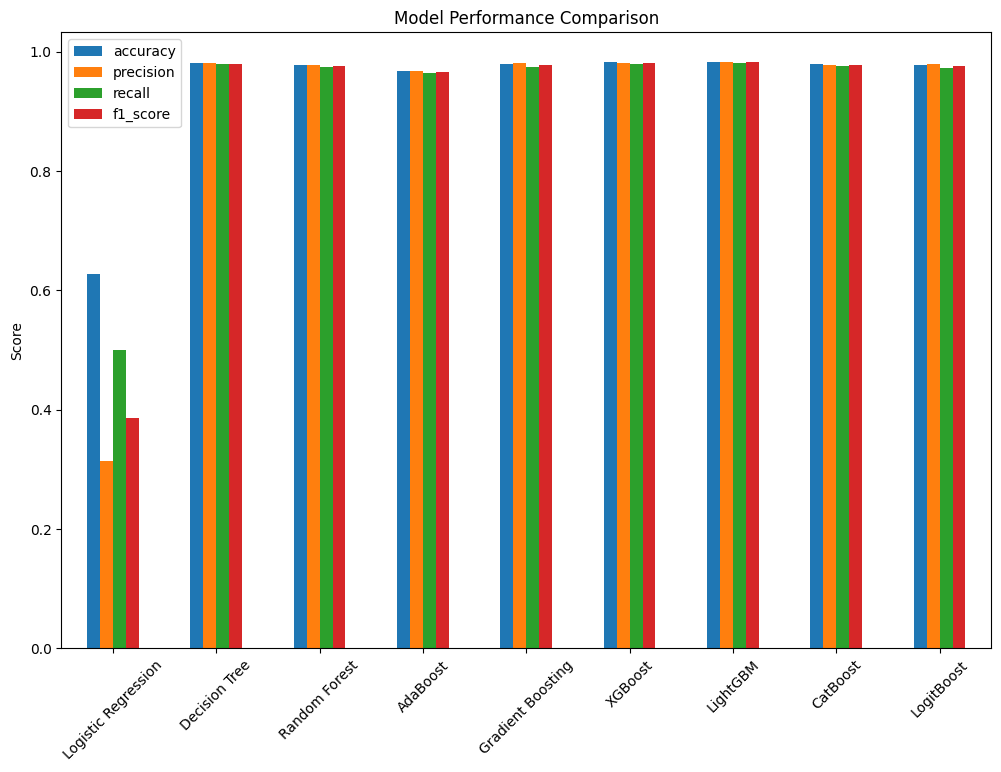

In [36]:
# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

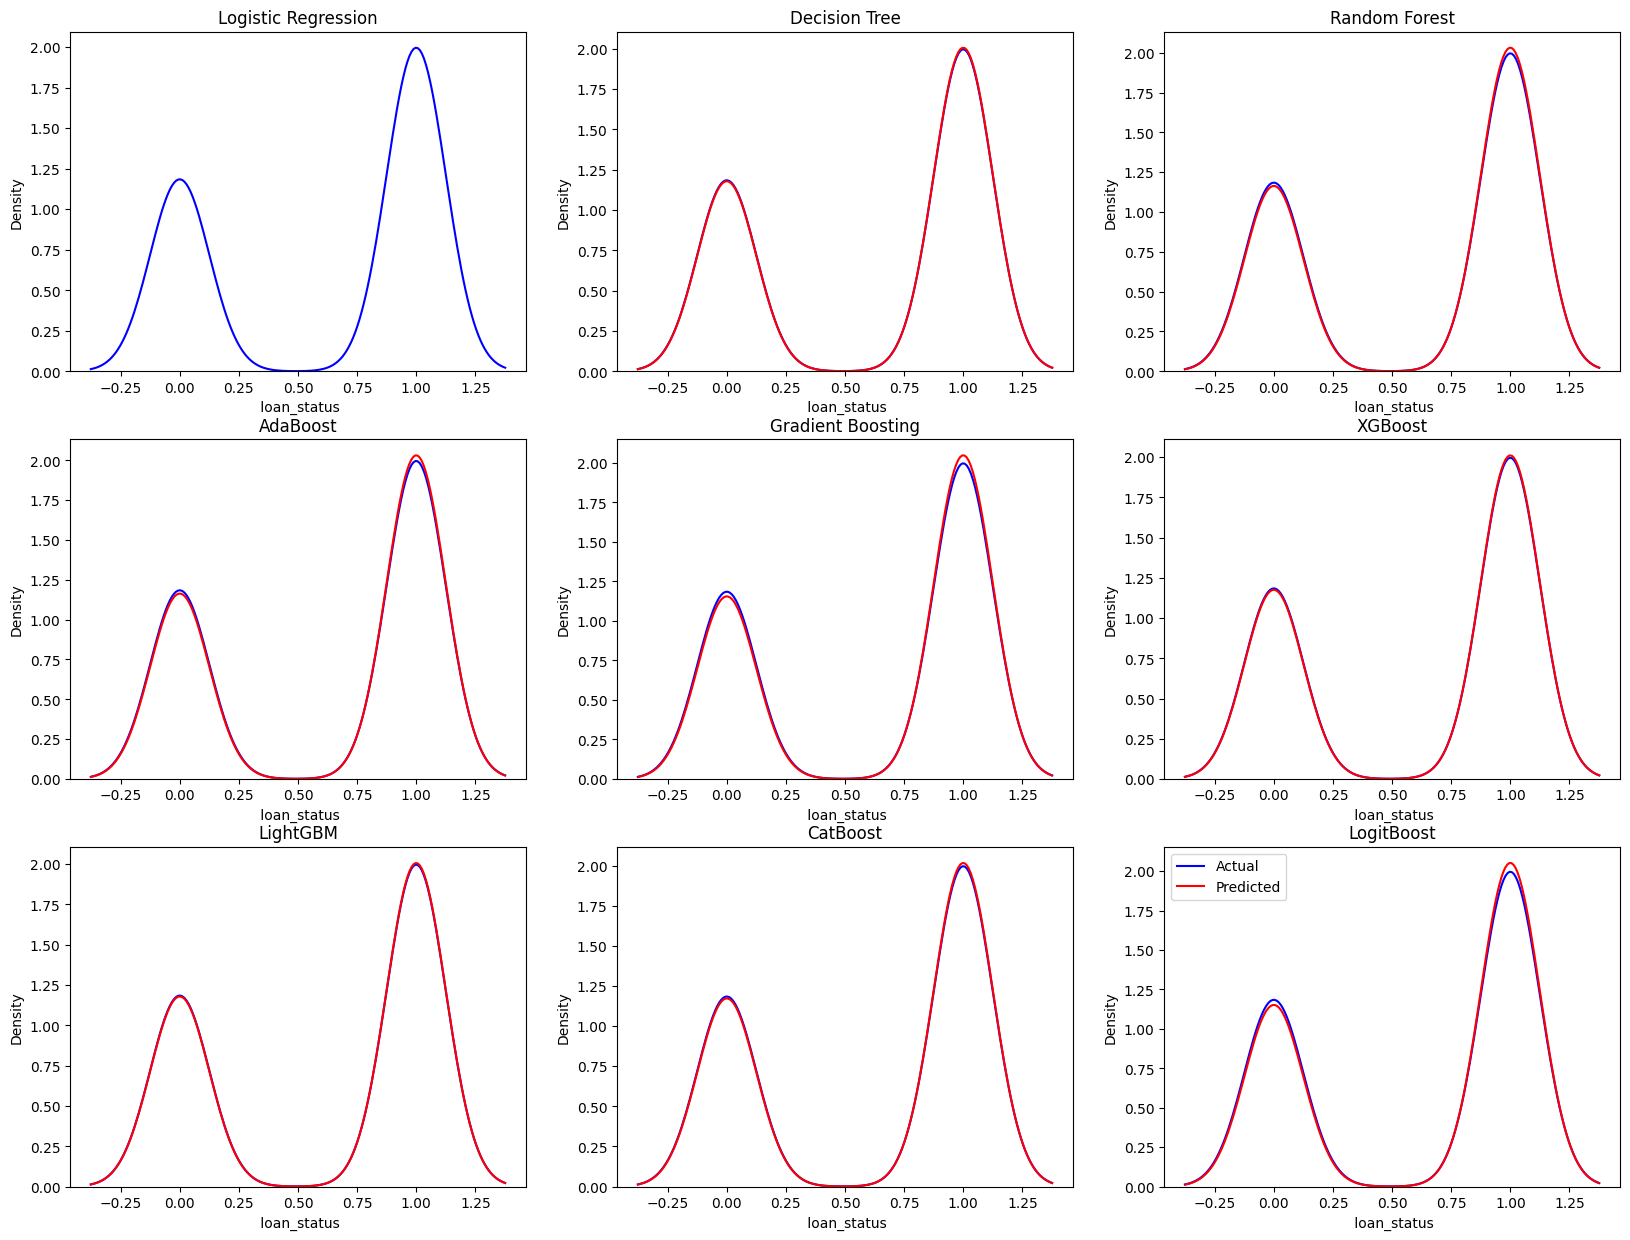

In [37]:
# Plotting the distributions
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

model_names = list(models.keys())

for i, name in enumerate(model_names):
    sns.kdeplot(y_test, ax=ax[i//3, i%3], label='Actual', color='blue')
    sns.kdeplot(predictions[name], ax=ax[i//3, i%3], label='Predicted', color='red')
    ax[i//3, i%3].set_title(name)

plt.legend()
plt.show()

##7.Conclusion

From the exploratory data analysis, we can conclude that the following factors are important for the approval of loans:

1. **CIBIL Score**:
   - Individuals with higher CIBIL scores have a higher likelihood of loan approval. This suggests that creditworthiness, as measured by the CIBIL score, plays a significant role in the loan approval process.

2. **Number of Dependents**:
   - Individuals with a higher number of dependents tend to have a lower likelihood of loan approval. This could be due to the perceived increased financial burden associated with supporting more dependents, which may affect the applicant's ability to repay the loan.

3. **Assets**:
   - Individuals with higher asset values, including both movable and immovable assets, have a higher likelihood of loan approval. This indicates that having substantial assets improves the chances of securing a loan, as it provides more collateral and financial security to the lender.

4. **Loan Amount and Tenure**:
   - Individuals requesting higher loan amounts and those opting for shorter loan tenures tend to have a higher likelihood of loan approval. This could be because higher loan amounts with shorter tenures indicate a strong financial position and ability to repay the loan quickly.


LightGBM is the best-performing model in this case, followed closely by XGBoost. Both models exhibit high accuracy, precision, recall, and F1-scores, making them suitable choices for loan approval prediction tasks.

1. **LightGBM**:
   - **Accuracy**: 0.983607 (highest)
   - **Precision**: 0.983071
   - **Recall**: 0.981824
   - **F1-Score**: 0.982441 (highest)
2. **XGBoost**:
   - **Accuracy**: 0.982436
   - **Precision**: 0.982127
   - **Recall**: 0.980252
   - **F1-Score**: 0.981175